# Technical Indicators
Adding technical indicator values

### Importing Libraries and Data

In [6]:
import pandas as pd
import _pickle as pickle
import numpy as np
import matplotlib as plt
plt.style.use('bmh')

In [168]:
df = pd.read_csv('BTC-USD.csv')

# Viewing the DF
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


### Datetime Conversion

In [169]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

## Charting Values

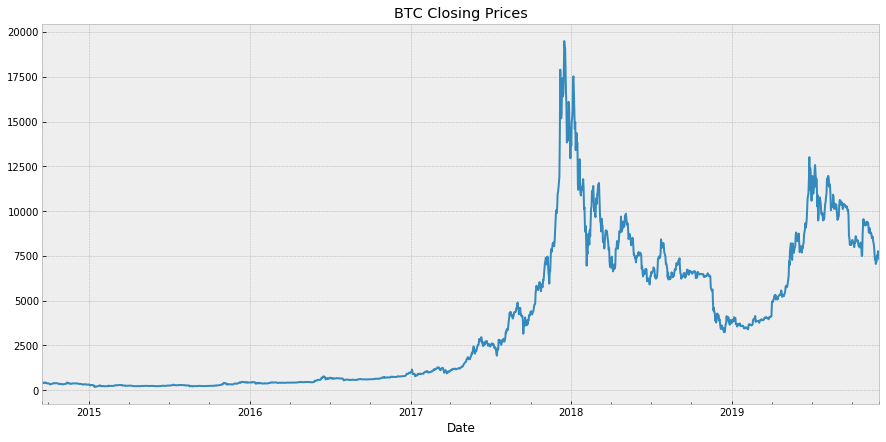

In [170]:
# Viewing the Chart of Closing Values
df['Close'].plot(figsize=(15,7), title='BTC Closing Prices');

## Creating the Technical Indicators

In [171]:
def SMA(df, periods=50):
    """
    Calculating the Simple Moving Average for the past n days
    
    **Values must be descending**
    """
    lst = []
        
    for i in range(len(df)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            # Calculating the SMA
            lst.append(round(np.mean(df[i:periods+i]), 2))
        
    return lst

In [178]:
def Stoch(closes, lows, highs, periods=14, d_periods=3):
    """
    Calculating the Stochastic Oscillator for the past n days
    
    **Values must be descending**
    """
    k_lst = []
    
    d_lst = []
    
    for i in range(len(closes)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            k_lst.append(np.nan)
            
            d_lst.append(np.nan)
            
        else:
            
            # Calculating the Stochastic Oscillator
            
            # Calculating the %K line
            highest = max(highs[i:periods+i])
            lowest = min(lows[i:periods+i])
            
            k = ((closes[i] - lowest) / (highest - lowest)) * 100
            
            k_lst.append(round(k, 2))
            
            # Calculating the %D line
            if len(k_lst) < d_periods:
                d_lst.append(np.nan)
            else:
                d_lst.append(round(np.mean(k_lst[-d_periods-1:-1])))
    
    return k_lst, d_lst
    

In [179]:
def RSI(df, periods=14):
    """
    Calculates the Relative Strength Index
    
    **Values must be descending**
    """
    
    df = df.diff()
    
    lst = []
    
    for i in range(len(df)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            
            # Calculating the Relative Strength Index
            avg_gain = sum([x for x in df[i:periods+i] if x >= 0]) / periods
            avg_loss = sum([abs(x) for x in df[i:periods+i] if x < 0]) / periods
            
            rs = avg_gain / avg_loss
            
            rsi = 100 - (100 / (1 + rs))
            
            lst.append(round(rsi, 2))
            
    return lst

## Creating New Values and Plotting
Based on the Indicators

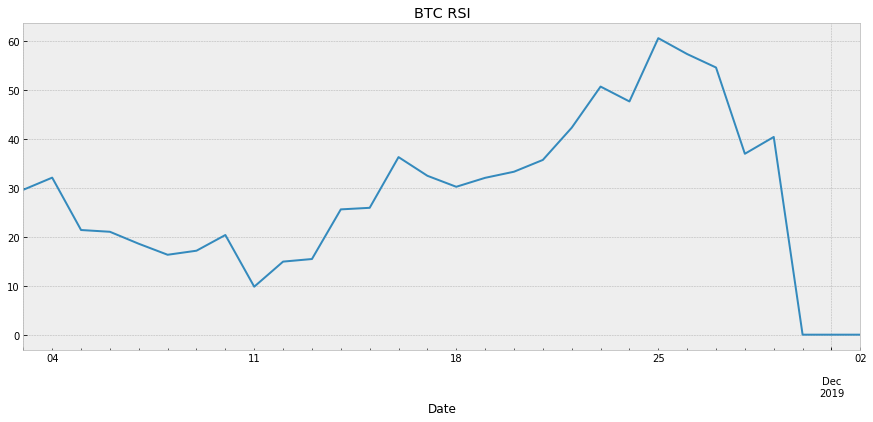

In [185]:
df['RSI'] = RSI(df.Close)

# Plotting
df['RSI'][-30:].plot(figsize=(15,6), title='BTC RSI');

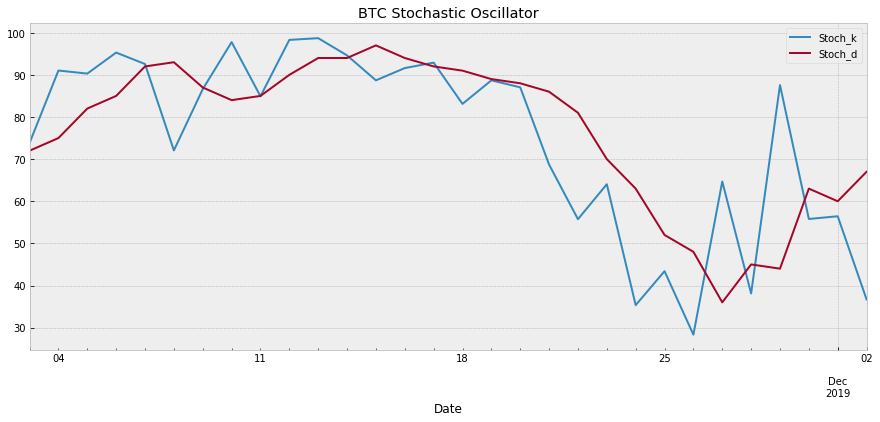

In [184]:
df['Stoch_k'], df['Stoch_d'] = Stoch(df.Close, df.Low, df.High)

# Plotting
df[-30:].plot(y=['Stoch_k', 'Stoch_d'], figsize=(15,6), title='BTC Stochastic Oscillator');

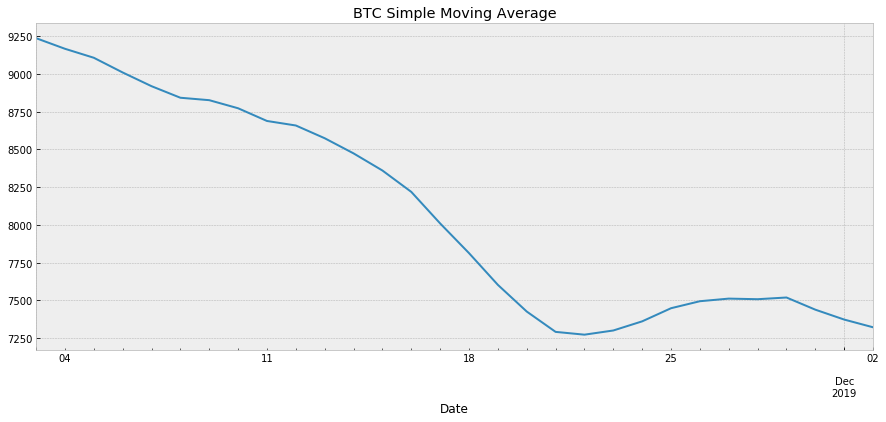

In [188]:
df['SMA'] = SMA(df.Close, 6)

# Plotting
df['SMA'][-30:].plot(figsize=(15,6), title='BTC Simple Moving Average');